<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/AI_W9_31_03_2023(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

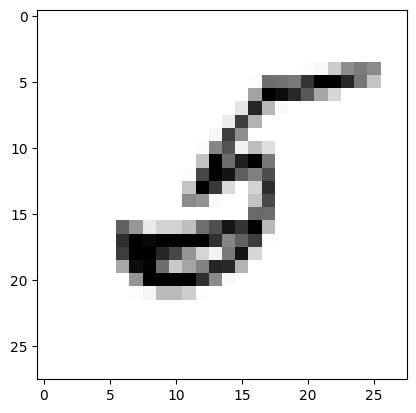

So: 5


In [ ]:
import matplotlib.pyplot as plt
digit = train_images[1111]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print ('So:',train_labels[1111])

<ipython-input-19-3c9ee52b5012>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


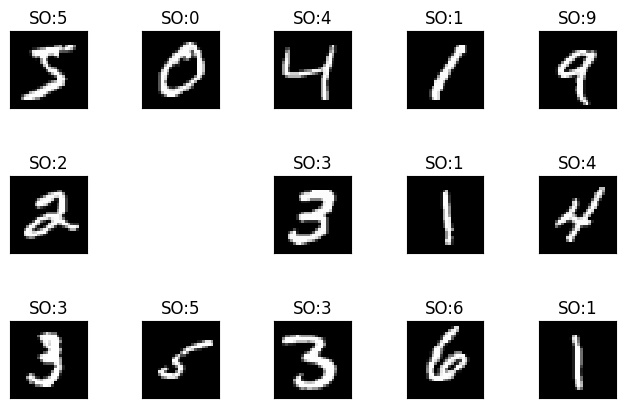

In [ ]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('SO:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = test_images
y = test_labels

In [ ]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical (test_labels,10)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10 ,batch_size=128)
test_loss, test_acc = model.evaluate(test_images ,test_labels)
print('Mat mat :',test_loss)
print('Do chinh xac :',test_acc)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0077 - accuracy: 0.9983
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 7.0173e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 5.2529e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 4.0029e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0631 - a

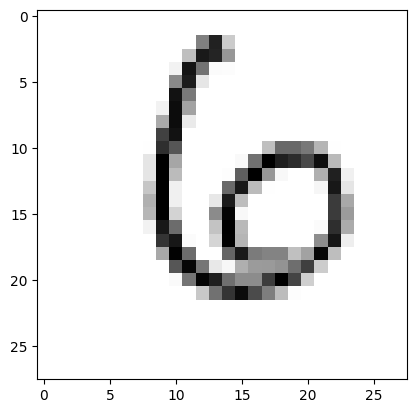

So: 6


In [ ]:
digit = x[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print ('So:',y[100])

In [ ]:
x_pred= x[5555].reshape(1, 28*28)
x_pred= x_pred.astype('float32')/255
y_pred = model.predict(x_pred)
print (y_pred) 

1/1 [==============================] - 0s 45ms/step
[[1.0005584e-20 6.2597103e-21 1.1576072e-14 1.0000000e+00 2.5637317e-29
  2.9465068e-14 6.3043905e-25 1.4584560e-19 6.8788277e-14 8.0183035e-21]]


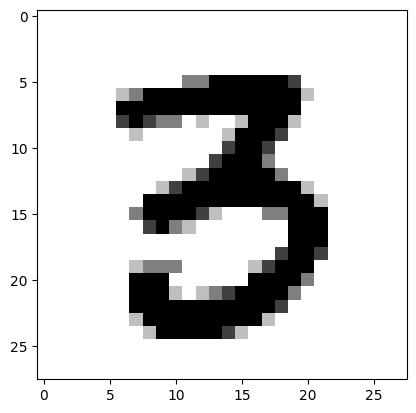

So: 3


In [ ]:
digit = x[5555]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print ('So:',y[5555])

In [ ]:
import numpy as np
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 106ms/step


array([3])

In [ ]:
model.save('test1.h5')

In [ ]:
model10=load.model('test1.h5')

NameError: ignored

In [ ]:

from keras.utils import load_img
img = load_img (filename,target_size=(32,32))
img = img_to_array(img)
img = img.reshape (1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)